In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
dielectron = pd.read_csv("dielectron.csv")

In [3]:
dielectron.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

In [4]:
#dropping columns that are not required for the model
dielectron = dielectron.drop(["Run","Event"],axis=1) 

In [5]:
dielectron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   E1      100000 non-null  float64
 1   px1     100000 non-null  float64
 2   py1     100000 non-null  float64
 3   pz1     100000 non-null  float64
 4   pt1     100000 non-null  float64
 5   eta1    100000 non-null  float64
 6   phi1    100000 non-null  float64
 7   Q1      100000 non-null  int64  
 8   E2      100000 non-null  float64
 9   px2     100000 non-null  float64
 10  py2     100000 non-null  float64
 11  pz2     100000 non-null  float64
 12  pt2     100000 non-null  float64
 13  eta2    100000 non-null  float64
 14  phi2    100000 non-null  float64
 15  Q2      100000 non-null  int64  
 16  M       99915 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 13.0 MB


In [6]:
dielectron.describe()

E1           px1             py1            pz1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       36.436466       0.135897       0.182291      -1.508037   
std        41.216203      13.404976      13.470281      51.603652   
min         0.377928    -250.587000    -126.079000    -840.987000   
25%         8.458595      -5.233675      -5.276248     -15.859825   
50%        21.717000       0.141339       0.099092      -0.312987   
75%        50.003350       5.714560       5.648087      13.212650   
max       850.602000     134.539000     147.467000     760.096000   

                 pt1           eta1           phi1            Q1  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean       14.412167      -0.064095       0.021614      -0.00548   
std        12.388740       1.462137       1.799562       0.99999   
min         0.219629      -4.165380      -3.141580      -1.00000   
25%         3.771172      -1.283883      -1.527030      -1.00000   
50%        12.967800      -0.061178       0.034324      -1.00000   
75%        20.018925       1.144408       1.562355       1.00000   
max       265.578000       2.622970       3.141420       1.00000   

                  E2            px2            py2            pz2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       44.002901      -0.003984       0.124654      -1.590559   
std        46.751132      13.127404      13.168867      61.430040   
min         0.472500    -233.730000    -145.651000    -655.396000   
25%        11.055725      -4.794770      -4.605965     -22.036950   
50%        25.264600      -0.035638       0.083665      -0.690244   
75%        66.925525       4.819540       5.061860      19.005825   
max       948.375000     227.330000     166.283000     935.558000   

                 pt2           eta2           phi2             Q2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       13.802036      -0.072830       0.021385      -0.004220   
std        12.460549       1.738033       1.817031       0.999996   
min         0.026651      -7.064790      -3.141580      -1.000000   
25%         3.738103      -1.892287      -1.556925      -1.000000   
50%        11.690950      -0.135911       0.026986      -1.000000   
75%        19.596400       1.768253       1.596737       1.000000   
max       281.654000       3.060550       3.141290       1.000000   

                  M  
count  99915.000000  
mean      30.019521  
std       25.255847  
min        2.000080  
25%       12.445200  
50%       21.283100  
75%       39.025050  
max      109.999000

In [7]:
dielectron.isnull().sum()

E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M       85
dtype: int64

In [8]:
dielectron["M"].fillna(dielectron["M"].median(),inplace=True)

In [9]:
dielectron.rename(columns={'px1 ':'px1'}, inplace=True) 

In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

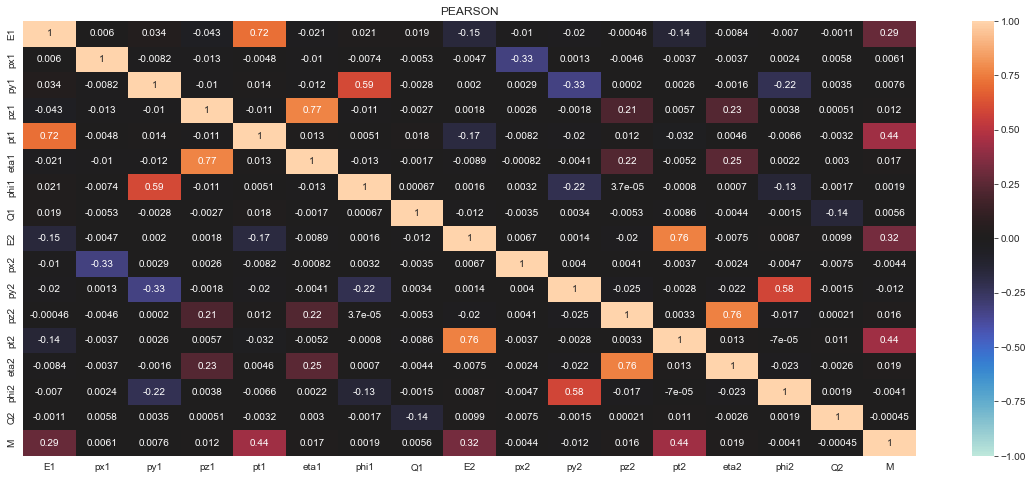

In [11]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(dielectron.corr(),annot=True,vmin=-1,center=0,vmax=1)
plt.title("PEARSON")
plt.show()

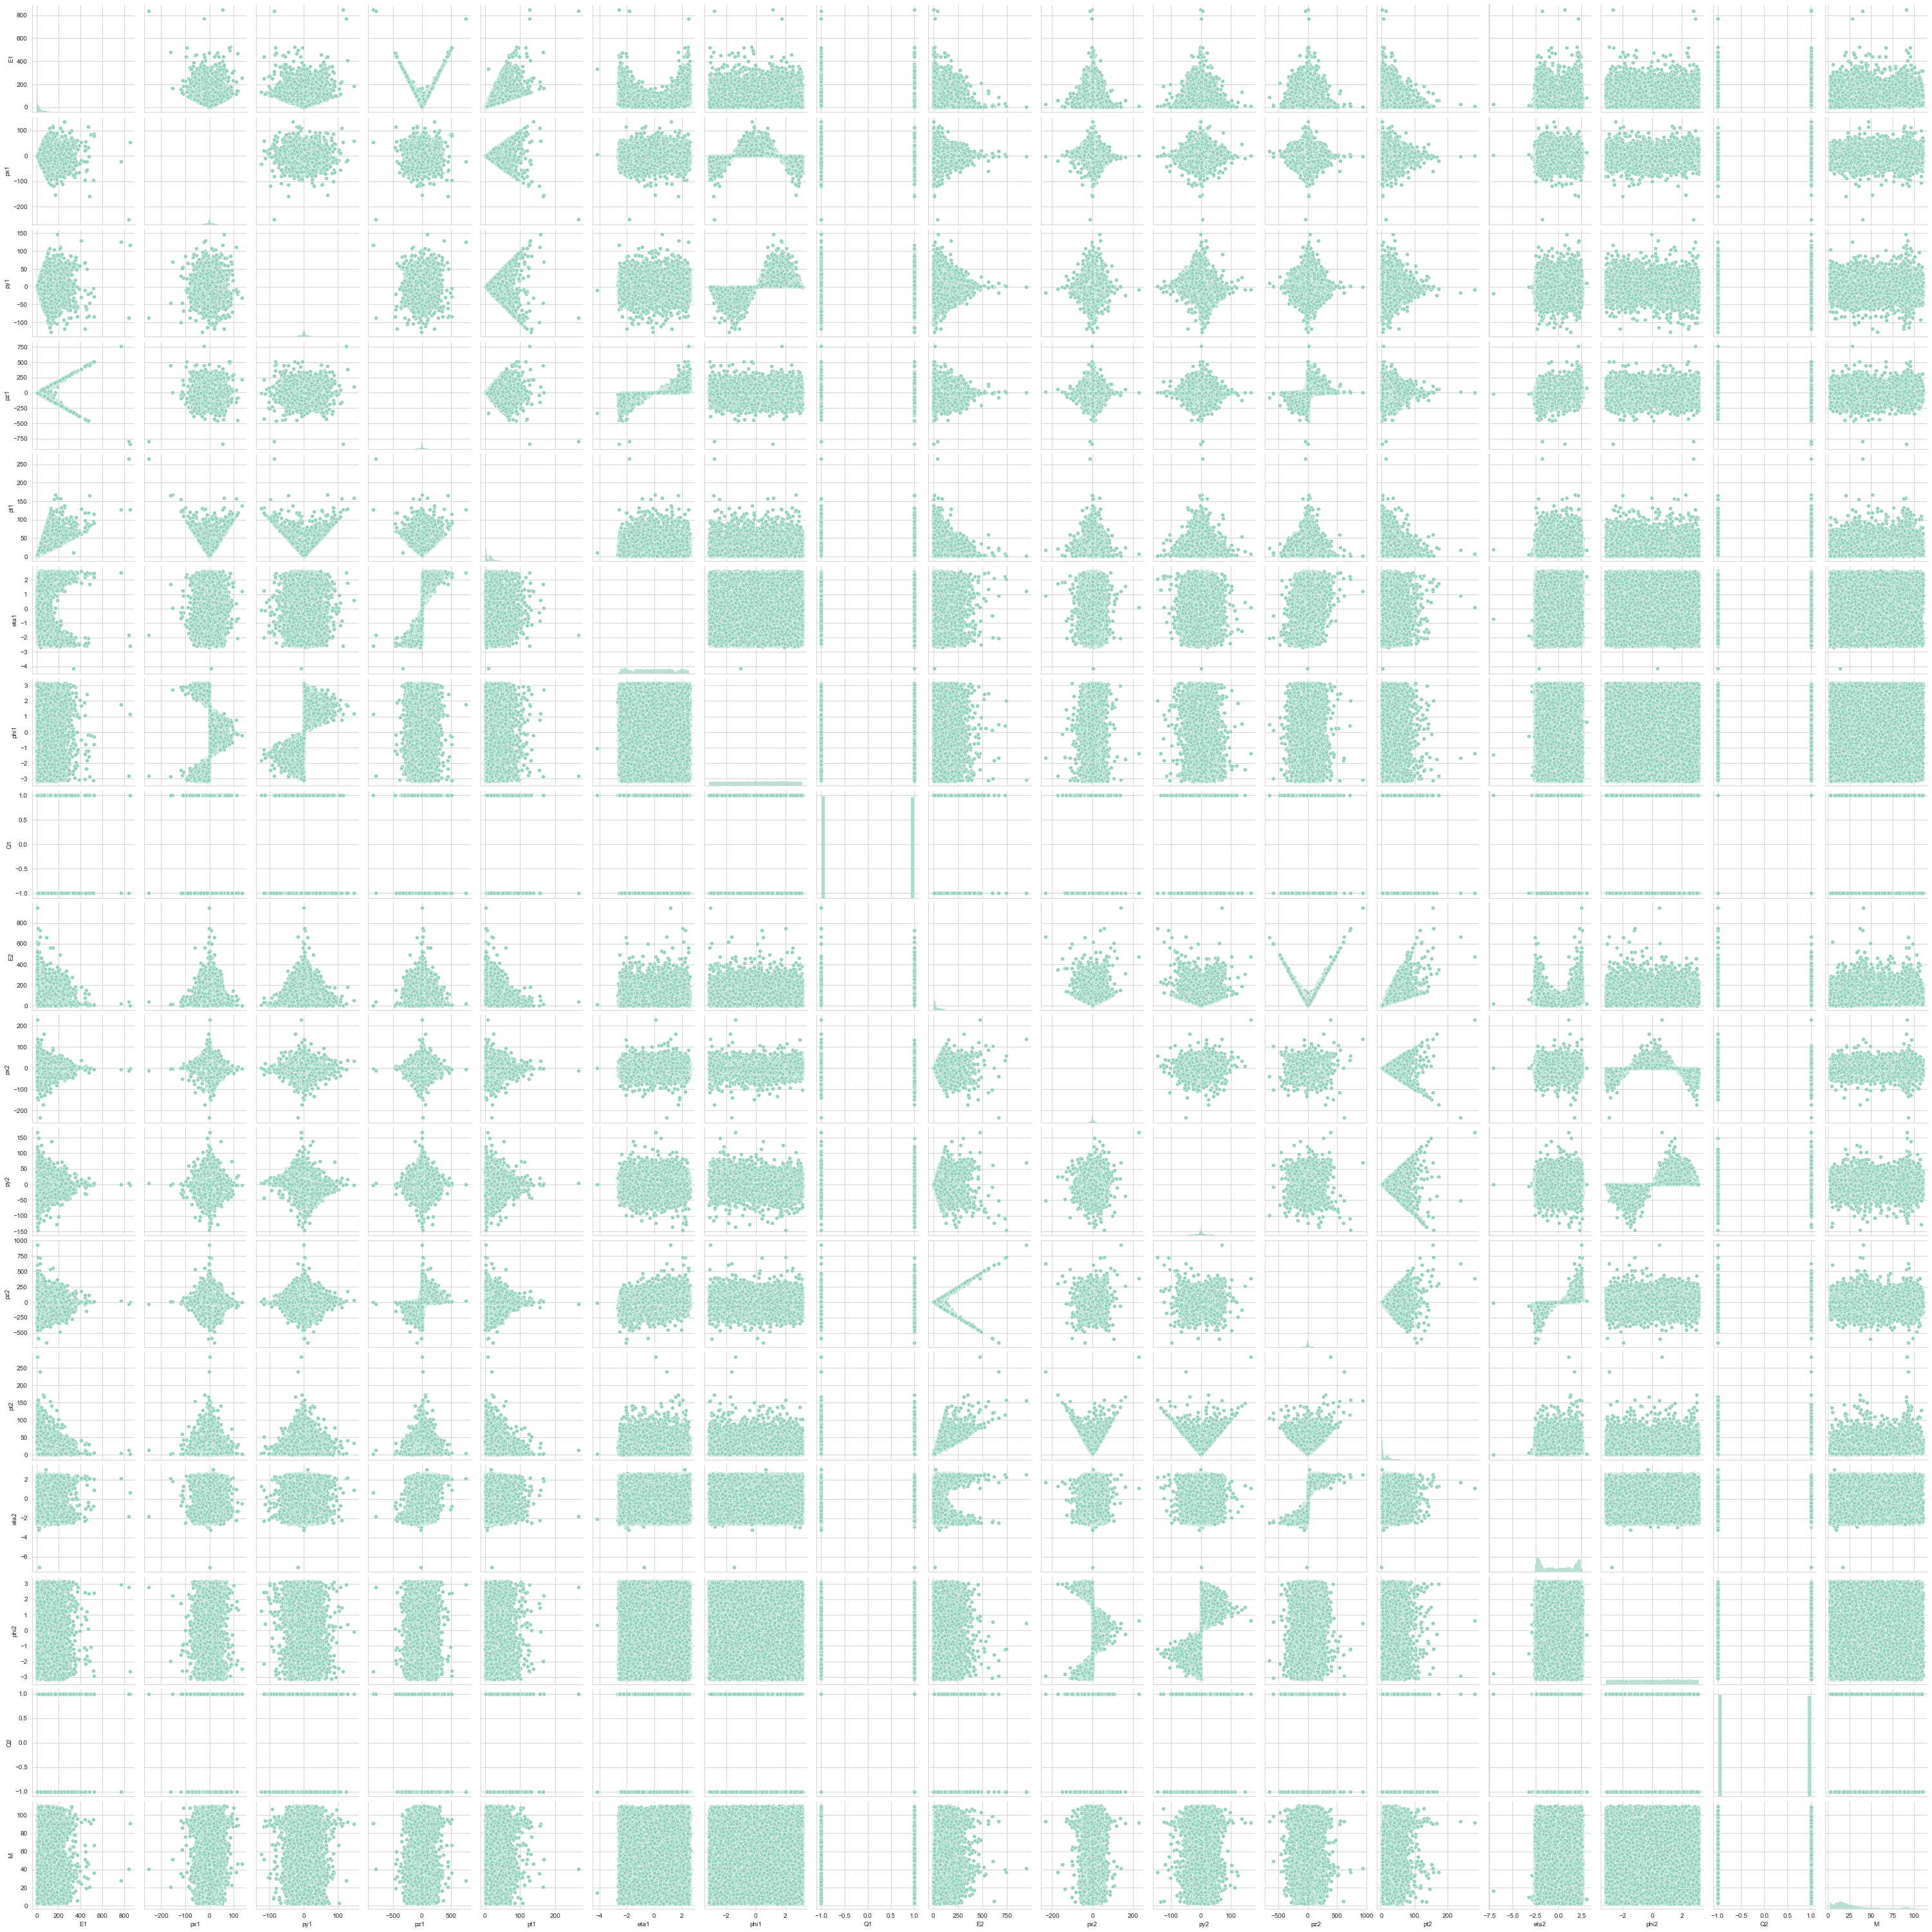

In [12]:
sns.pairplot(dielectron)

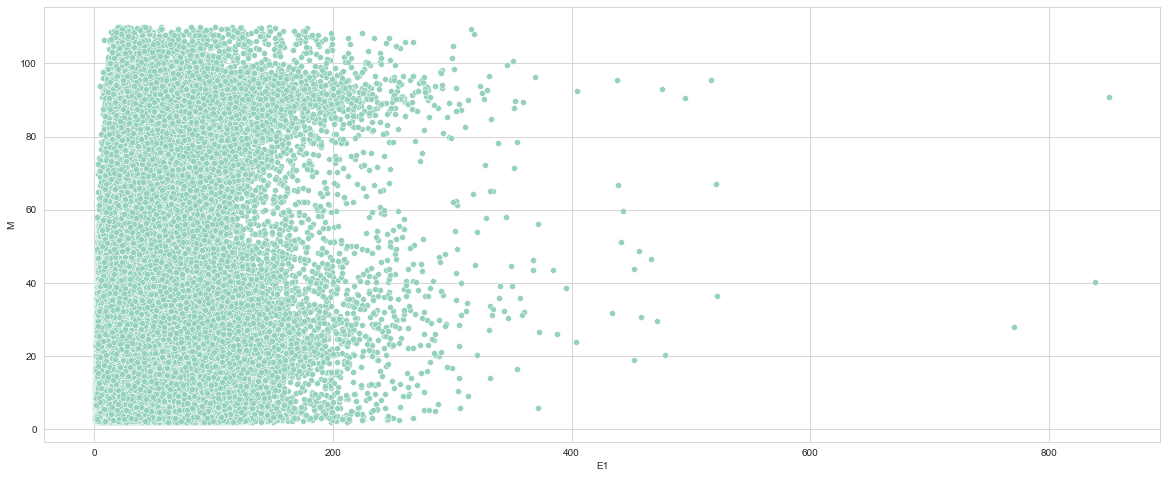

In [13]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="E1",y="M",data=dielectron)
plt.show()

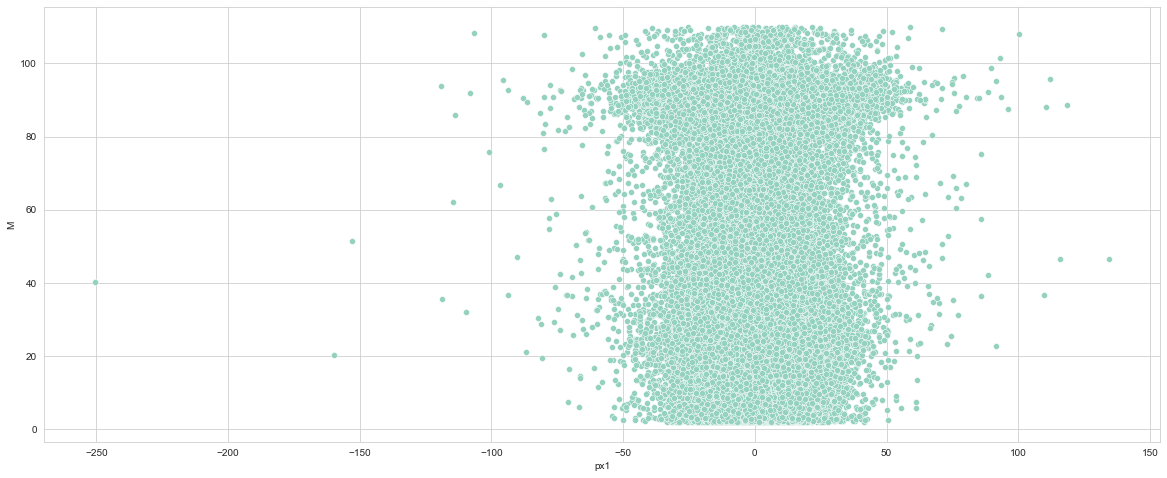

In [14]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="px1",y="M",data=dielectron)
plt.show()

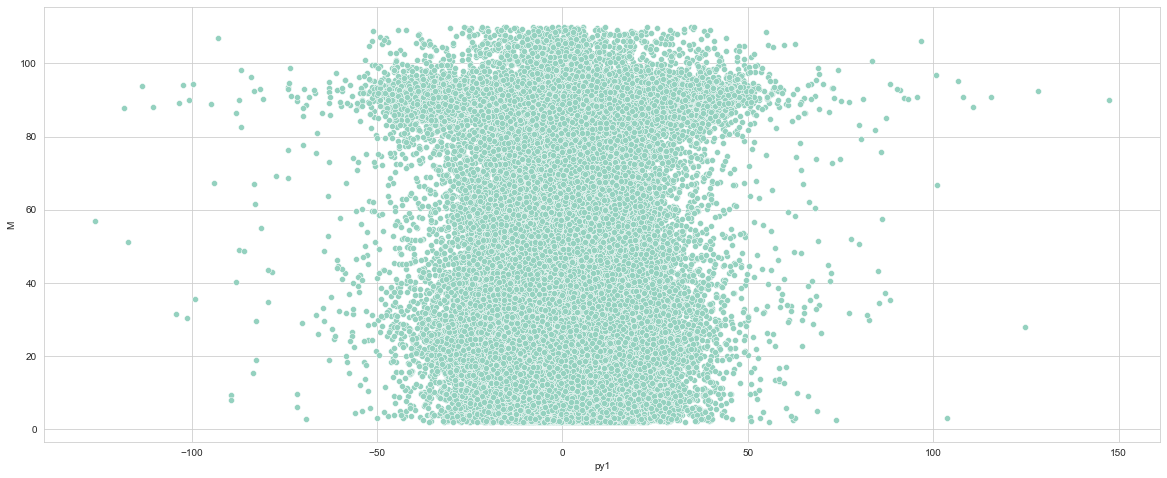

In [15]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="py1",y="M",data=dielectron)
plt.show()

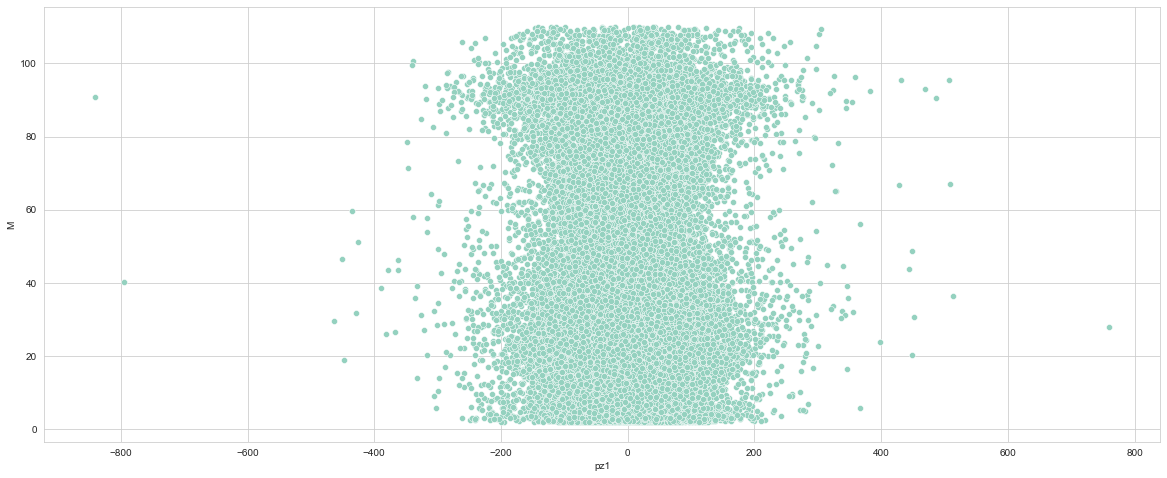

In [16]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="pz1",y="M",data=dielectron)
plt.show()

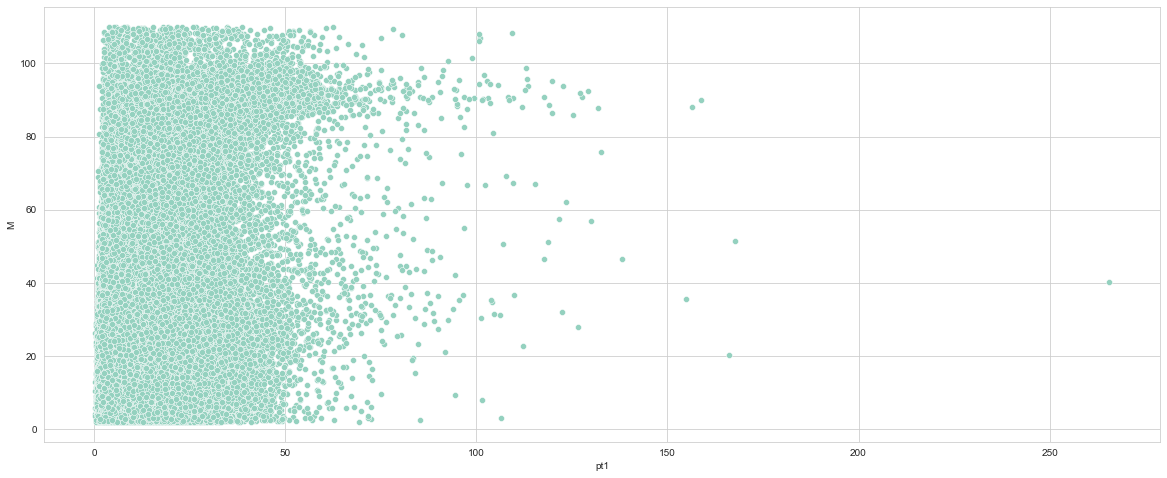

In [17]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="pt1",y="M",data=dielectron)
plt.show()

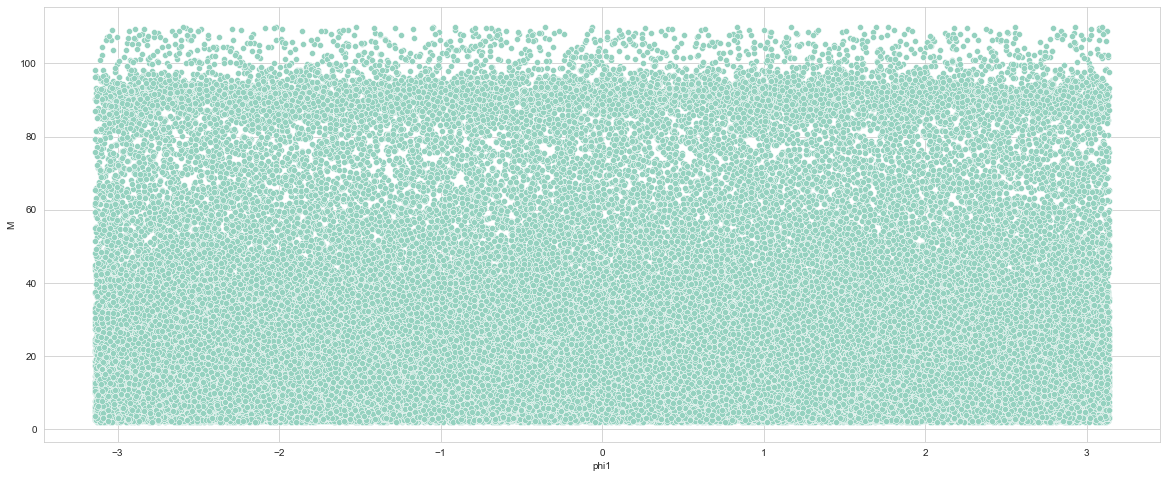

In [18]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="phi1",y="M",data=dielectron)
plt.show()

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M', ylabel='Density'>

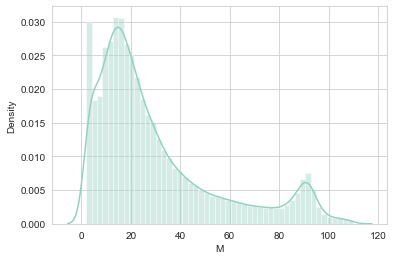

In [19]:
sns.distplot(dielectron['M'])

In [20]:
#data split for training and testing
X = dielectron.drop("M",axis=1)
y = dielectron["M"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
xgbr = XGBRegressor()

In [22]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
predictions = xgbr.predict(X_test)

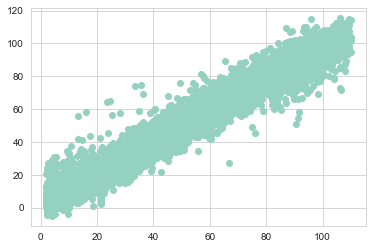

In [24]:
plt.scatter(y_test,predictions)

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


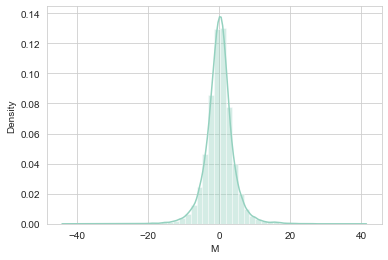

In [25]:
sns.distplot((y_test-predictions),bins=50);

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.827912563936547
MSE: 16.689349814548688
RMSE: 4.085260066941722


In [27]:
xgbr.score(X_test, y_test)

0.9738134568432075

In [28]:
#using gridsearch to see if results can be optimized
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [29]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_o...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                          

In [31]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}
Lowest RMSE:  2.734902406068107


In [38]:
xgbr2 = XGBRegressor(colsample_bytree=0.7, learning_rate = 0.1, max_depth=6, n_estimators=1000)

In [39]:
xgbr2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [40]:
preds = xgbr2.predict(X_test)

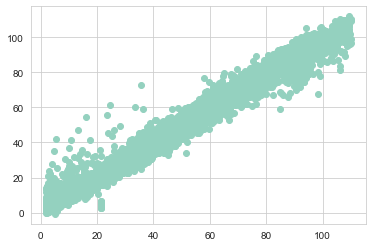

In [42]:
plt.scatter(y_test,preds)

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


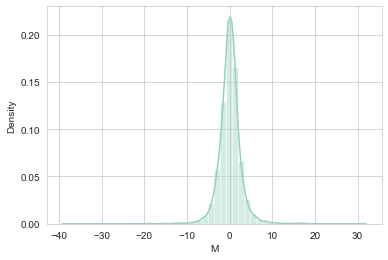

In [43]:
sns.distplot((y_test-preds),bins=50);

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 1.7815674191905342
MSE: 7.289829829888288
RMSE: 2.699968486832446


In [45]:
xgbr2.score(X_test, y_test)

0.9885618406009063